# What key factors significantly impact suicide rates in the United States?

### Introduction:
This study examines suicide rates across U.S. states from 2000 to 2022, investigating how demographic, socioeconomic, and psychosocial factors may influence these rates. We analyze variables like unemployment, gun ownership, gender, age, population density, and drug use, comparing their impact on suicide rates across states.

![Description](https://github.com/udaysidhu99/thecharttoppers/blob/main/miscellaneous/sadness-5520345_1920.jpg?raw=true)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import geopandas as gpd
import folium
import requests
from IPython.display import display
import os
import plotly.graph_objects as go
from plotly.subplots import make_subplots
!pip install -U kaleido



In [2]:
pio.templates.default = "presentation"

### Dataset Information
- **Source**: Centers for Disease Control and Prevention (CDC) Wonder
- **Dataset Title**: "State Suicide Mortality Rates (2000 to 2022)"
- **File Name**: year_state_suicide.csv
- **Website**: [CDC Wonder Multiple Cause of Death Data](https://wonder.cdc.gov/mcd.html)
- **Accessed on**: October 18, 2024

### Data Description
The dataset contains the number of suicide deaths recorded across various U.S. states from the year 2000 to 2022. It includes the following:

- **Year**: The year the suicides were recorded.
- **State**: U.S. state where the suicides occurred.
- **Deaths**: Number of suicide deaths.
- **Population**: Population of the state for that year.



In [3]:
# Import the Year-State Suicide dataset
suicide_state_year_path = 'https://raw.githubusercontent.com/udaysidhu99/thecharttoppers/refs/heads/main/datasets/year_state_suicide.csv'
suicide_state_year_df = pd.read_csv(suicide_state_year_path)

# Clean the Year-State Suicide dataset
# Drop specified columns
suicide_state_year_df = suicide_state_year_df.drop(columns=['Year Code', 'State Code', 'Crude Rate'])
# Convert datatypes
suicide_state_year_df['Year'] = suicide_state_year_df['Year'].astype(int)
suicide_state_year_df['Deaths'] = suicide_state_year_df['Deaths'].astype(int)
suicide_state_year_df['Population'] = suicide_state_year_df['Population'].astype(float)
suicide_state_year_df['State'] = suicide_state_year_df['State'].str.strip().str.title()
# Add a column for suicide rate(population normalised): Deaths per 100k
suicide_state_year_df['Deaths per 100k'] = (suicide_state_year_df['Deaths'] / suicide_state_year_df['Population']) * 100000
suicide_state_year_df

,Year,State,Deaths,Population,Deaths per 100k
0,2000,Alabama,591,4447100.0,13.289559
1,2000,Alaska,137,626932.0,21.852450
2,2000,Arizona,793,5130632.0,15.456186
3,2000,Arkansas,353,2673400.0,13.204159
4,2000,California,3014,33871648.0,8.898297
...,...,...,...,...,...
1168,2022,Virginia,1225,8683619.0,14.107022
1169,2022,Washington,1261,7785786.0,16.196181
1170,2022,West Virginia,356,1775156.0,20.054575
1171,2022,Wisconsin,931,5892539.0,15.799641


### Dataset Information
- **Source**: Centers for Disease Control and Prevention (CDC) Wonder
- **Dataset Title**: "State Suicide Mortality Rates by Year, State, Age Group, Gender (2000 to 2022)"
- **File Name**: year_state_age_gender.csv
- **Website**: [CDC Wonder Multiple Cause of Death Data](https://wonder.cdc.gov/mcd.html)
- **Accessed on**: October 21, 2024

### Data Description
This dataset provides detailed annual suicide statistics across U.S. states from 2000 to 2022, broken down by age group and gender. It includes suicide death counts, population data, and crude rates for different demographics. It includes the following:

- **Year**: The year when the data was recorded.
- **State**: The U.S. state where the data was collected.
- **Gender**: The gender category (Male or Female).
- **Five-Year Age Groups**: Age groups in five-year intervals.
- **Deaths**: The number of suicides for the specified year, state, age group, and gender.
- **Population**: The population count for the specific demographic (state, year, age group, and gender).
- **Crude Rate**: The suicide rate per 100,000 people for each demographic. Some values may be marked as "Unreliable" due to low counts.







In [4]:
# Import the Year-State-Gender-Age dataset
suicide_state_year_gender_age = 'https://raw.githubusercontent.com/udaysidhu99/thecharttoppers/refs/heads/main/datasets/year_state_age_gender.csv'
suicide_state_year_gender_age_df = pd.read_csv(suicide_state_year_gender_age)

# Clean the Year-State-Gender-Age dataset
# Drop specified columns
columns_to_drop = ['State Code', 'Year Code', 'Crude Rate', 'Gender Code','Five-Year Age Groups Code']
suicide_state_year_gender_age_df = suicide_state_year_gender_age_df.drop(columns=columns_to_drop)
# Define the age groups to remove due to lack of Population data
age_groups_to_remove = ['< 1 year','1-4 years','5-9 years','85-89 years', '90-94 years', '95-99 years', '100+ years','Not Stated']
# Convert datatypes
suicide_state_year_gender_age_df = suicide_state_year_gender_age_df[~suicide_state_year_gender_age_df['Five-Year Age Groups'].isin(age_groups_to_remove)]
suicide_state_year_gender_age_df['Year'] = suicide_state_year_gender_age_df['Year'].astype(int)
suicide_state_year_gender_age_df['Deaths'] = suicide_state_year_gender_age_df['Deaths'].astype(int)
suicide_state_year_gender_age_df['Population'] = suicide_state_year_gender_age_df['Population'].astype(float)
suicide_state_year_gender_age_df['State'] = suicide_state_year_gender_age_df['State'].str.strip().str.title()
# Remove spaces from the beginning and end of 'Five-Year Age Groups'
suicide_state_year_gender_age_df['Five-Year Age Groups'] = suicide_state_year_gender_age_df['Five-Year Age Groups'].str.strip()
suicide_state_year_gender_age_df.sample(5)


,Year,State,Gender,Five-Year Age Groups,Deaths,Population
30927,2019,Missouri,Male,30-34 years,80,200403.0
24084,2015,Massachusetts,Female,35-39 years,11,210482.0
35687,2022,Louisiana,Female,45-49 years,10,129787.0
14571,2009,Missouri,Male,15-19 years,25,219508.0
16488,2010,Oklahoma,Male,35-39 years,48,117446.0


### Dataset Information
- **Source**: Centers for Disease Control and Prevention (CDC) Wonder
- **Dataset Title**: "State Suicide Mortality Rates by Year, State, Gender, Race (2000 to 2022)"
- **File Name**: year_state_gender_race.csv
- **Website**: [CDC Wonder Multiple Cause of Death Data](https://wonder.cdc.gov/mcd.html)
- **Accessed on**: October 25, 2024

### Data Description
This dataset provides detailed annual suicide statistics across U.S. states from 2000 to 2022, broken down by gender and race category. It includes the following:

- **Year**: The year when the data was recorded.
- **State**: The U.S. state where the data was collected.
- **Gender**: The gender category (Male or Female).
- **Race**: Race categories (White, American Indian or Alaska Native, Asian or Pacific Islander, Black or African American, and More than one Race). In the years 2021-2022, the Asian or Pacific Islander category is divided into two: Asian and Native Hawaiian or Other Pacific Islander.
- **Deaths**: The number of suicides for the specified year, state, age group, and gender.
- **Population**: The population count for the specific demographic (state, year, gender, and race).
- **Crude Rate**: The suicide rate per 100,000 people for each demographic. Some values may be marked as "Unreliable" due to low counts.


In [5]:
# Import the Year-State-Gender-Race dataset
year_state_gender_race_df = pd.read_csv('https://raw.githubusercontent.com/udaysidhu99/thecharttoppers/refs/heads/main/datasets/year_state_gender_race.csv')

# Clean the Year-State-Gender-Race dataset
# Drop specified columns
year_state_gender_race_df = year_state_gender_race_df.drop(columns=['Year Code', 'State Code', 'Crude Rate','Race Code','Gender Code'])
#filter out years after 2017 as new category 'More than one race' was added from 2018 onwards
year_state_gender_race_df = year_state_gender_race_df[(year_state_gender_race_df['Year'] >= 2000) & (year_state_gender_race_df['Year'] <= 2017)]

# Convert datatypes
year_state_gender_race_df['Year'] = year_state_gender_race_df['Year'].astype(int)
year_state_gender_race_df['Deaths'] = year_state_gender_race_df['Deaths'].astype(int)
year_state_gender_race_df['Population'] = year_state_gender_race_df['Population'].astype(int)
year_state_gender_race_df['State'] = year_state_gender_race_df['State'].str.strip().str.title()
# Add a column Deaths per 100k
year_state_gender_race_df['Deaths per 100k'] = (year_state_gender_race_df['Deaths'] / year_state_gender_race_df['Population']) * 100000
# Rename columns
year_state_gender_race_df.rename(columns={'Deaths': 'Suicide Deaths'}, inplace = True)
year_state_gender_race_df

,Year,State,Gender,Race,Suicide Deaths,Population,Deaths per 100k
0,2000,Alabama,Female,American Indian or Alaska Native,0,12646,0.000000
1,2000,Alabama,Female,Asian or Pacific Islander,0,18791,0.000000
2,2000,Alabama,Female,White,107,1643179,6.511768
3,2000,Alabama,Male,Black or African American,64,541643,11.815901
4,2000,Alabama,Male,White,411,1575039,26.094592
...,...,...,...,...,...,...,...
4726,2017,Wyoming,Female,Asian or Pacific Islander,0,3786,0.000000
4727,2017,Wyoming,Female,Black or African American,0,4202,0.000000
4728,2017,Wyoming,Female,White,29,267334,10.847853
4729,2017,Wyoming,Male,Black or African American,0,5814,0.000000


In [6]:
# Group race into 5 broader categories
def map_race(race):
    """
    Maps individual race categories to broader categories to consolidate the dataset.

    Specifically, this function groups 'Asian' and 'Native Hawaiian or Other Pacific Islander'
    into a single category called 'Asian or Pacific Islander'. All other races remain unchanged.

    Parameters:
    race (str): The race category to be mapped.

    Returns:
    str: The mapped race category, with certain races consolidated under broader labels.
    """
    if race in ['Asian', 'Native Hawaiian or Other Pacific Islander']:
        return 'Asian or Pacific Islander'
    return race

year_state_gender_race_df['Race'] = year_state_gender_race_df['Race'].apply(map_race)
columns_to_group = [col for col in year_state_gender_race_df.columns if col not in ['Suicide Deaths', 'Population']]
updated_year_state_gender_race_df = year_state_gender_race_df.groupby(columns_to_group, as_index=False).agg({
    'Suicide Deaths': 'sum',
    'Population': 'sum'
})
updated_year_state_gender_race_df

,Year,State,Gender,Race,Deaths per 100k,Suicide Deaths,Population
0,2000,Alabama,Female,American Indian or Alaska Native,0.000000,0,12646
1,2000,Alabama,Female,Asian or Pacific Islander,0.000000,0,18791
2,2000,Alabama,Female,White,6.511768,107,1643179
3,2000,Alabama,Male,Black or African American,11.815901,64,541643
4,2000,Alabama,Male,White,26.094592,411,1575039
...,...,...,...,...,...,...,...
4726,2017,Wyoming,Female,Asian or Pacific Islander,0.000000,0,3786
4727,2017,Wyoming,Female,Black or African American,0.000000,0,4202
4728,2017,Wyoming,Female,White,10.847853,29,267334
4729,2017,Wyoming,Male,Black or African American,0.000000,0,5814


### Dataset Information
- **Source**: The Bureau of Labor Statistics
- **Dataset Title**: "Unemployment in America, Per US State"
- **File Name**: Unemployment in America Per US State.csv
- **Website**: [US Bureau of Labour Statistics](https://www.bls.gov/web/laus.supp.toc.htm)
- **Accessed on**: September 30, 2024

### Data Description
This dataset provides detailed annual suicide statistics across U.S. states from 2000 to 2022, broken down by gender and race category. It includes the following:

- **Year/Month**: The year and month when the data was recorded.
- **State/Area**: The U.S. state where the data was collected.
- **Total Civilian Non-Institutional Population in State/Area**: Includes all individuals aged 16 and older who are not in institutions or on active military duty, serving as a key demographic for labor statistics.
- **Total Civilian Labor Force in State/Area**: Includes all individuals aged 16 and older who are either employed or actively seeking work, excluding military personnel and institutionalized individuals.
- **Total Employment in State/Area**: Total number of individuals employed, including both full-time and part-time workers, within a specific state or area.
- **Total Unemployment in State/Area**: The “Total Unemployment in State/Area” is the number of individuals aged 16 and older actively seeking work but currently without a job.



In [7]:
# Import the Unemployment dataset
unemployment_df = pd.read_csv('https://raw.githubusercontent.com/udaysidhu99/thecharttoppers/refs/heads/main/datasets/Unemployment%20in%20America%20Per%20US%20State.csv')
numeric_columns = ['Total Civilian Non-Institutional Population in State/Area',
       'Total Civilian Labor Force in State/Area',
       'Total Employment in State/Area',
       'Total Unemployment in State/Area']

# Clean the Unemployment dataset
unemployment_df = unemployment_df.drop(["Percent (%) of State/Area's Population","Percent (%) of Labor Force Employed in State/Area","Percent (%) of Labor Force Unemployed in State/Area", 'FIPS Code'] ,axis = 1)
unemployment_df = unemployment_df[(unemployment_df["Year"] >= 2000) & (unemployment_df["Year"] <= 2022)]
unemployment_df.rename(columns={'State/Area': 'State'}, inplace=True)
# Convert the string datatypes to numeric
for i in range(len(numeric_columns)):
    unemployment_df[numeric_columns[i]] = unemployment_df[numeric_columns[i]].str.replace(',', '').str.strip()
unemployment_df[numeric_columns] = unemployment_df[numeric_columns].astype(int)
# Data contains separate enteries for Los Angeles County and New York City and are not included in their respective states, adding it back to the states that these counties belong to.
unemployment_df["State"] = unemployment_df["State"].replace('Los Angeles County','California')
unemployment_df["State"] = unemployment_df["State"].replace('New York city','New York')
unemployment_df = unemployment_df.groupby(['State','Year','Month'], as_index=False).sum()
# Keep unemployment records from the last month of each year and dropping month column
unemployment_df = unemployment_df[unemployment_df["Month"] == 12]
unemployment_df = unemployment_df.drop("Month", axis = 1)
# Add column Unemployed Population/ Labour Force
unemployment_df["Unemployed Population/ Labour Force"] = unemployment_df["Total Unemployment in State/Area"] / unemployment_df["Total Civilian Labor Force in State/Area"]
unemployment_df

,State,Year,Total Civilian Non-Institutional Population in State/Area,Total Civilian Labor Force in State/Area,Total Employment in State/Area,Total Unemployment in State/Area,Unemployed Population/ Labour Force
11,Alabama,2000,3386178,2140886,2040648,100238,0.046821
23,Alabama,2001,3398108,2114191,1989957,124234,0.058762
35,Alabama,2002,3412910,2120743,1996169,124574,0.058741
47,Alabama,2003,3431807,2133454,2007337,126117,0.059114
59,Alabama,2004,3457864,2132075,2023018,109057,0.051151
...,...,...,...,...,...,...,...
14027,Wyoming,2018,446415,292526,281141,11385,0.038920
14039,Wyoming,2019,448761,295088,282659,12429,0.042120
14051,Wyoming,2020,452401,291617,275785,15832,0.054290
14063,Wyoming,2021,455855,287235,276506,10729,0.037353


### Dataset Information
- **Source**: United States Census Bureau
- **Dataset Title**: "Table H-8. Median Household Income by State"
- **File Name**: median_household_income_by_state_2000-2023.csv
- **Website**: [US Census Bureau Historical Income Tables: Households](https://www.census.gov/data/tables/time-series/demo/income-poverty/historical-income-households.html)
- **Accessed on**: October 6, 2024

### Data Description
This dataset provides the median household income per year and state in the United States, in 2023 inflation-adjusted U.S. Dollars. It includes the following:

- **State**: The U.S. state where the data was collected.
- **Years 2000 to 2023 columns**: The median household income in U.S. Dollars for that specific year.






In [8]:
# Import the Median Household Income dataset
income_df = pd.read_csv('https://raw.githubusercontent.com/udaysidhu99/thecharttoppers/refs/heads/main/datasets/median_household_income_by_state_2000-2023.csv')

# Clean the Median Household Income dataset
# Transpose multiple columns of Years into one Year column and several rows
income_melted_df = income_df.set_index('State')
income_melted_df = income_melted_df.melt(ignore_index=False, var_name='Year', value_name='Median Income')
income_melted_df = income_melted_df.reset_index()
income_melted_df['Year'] = income_melted_df['Year'].astype(int)
income_melted_df['Median Income'] = income_melted_df['Median Income'].astype(int)
income_melted_df = income_melted_df.sort_values(['State', 'Year'])
income_melted_df

,State,Year,Median Income
1197,Alabama,2000,59070
1145,Alabama,2001,57340
1093,Alabama,2002,60570
1041,Alabama,2003,58790
989,Alabama,2004,56390
...,...,...,...
259,Wyoming,2019,76990
207,Wyoming,2020,76570
155,Wyoming,2021,79570
103,Wyoming,2022,76000


### Dataset Information
- **Source**: RAND Corporation
- **Dataset Title**: "State-Level Estimates of Household Firearm Ownership"
- **File Name**: gun_ownership_data.csv
- **Website**: [RAND Corporation](https://www.rand.org/pubs/tools/TL354.html)
- **Accessed on**: October 20, 2024

### Data Description
This dataset provides estimates of household firearm ownership across U.S. states from 2000 to 2016, highlighting ownership trends and changes over time. Key columns include:

- **Year:** Year of data collection
- **State:** U.S. state
- **Estimated Ownership Rate:** Estimated percentage of households with firearms


In [9]:
# Import the Gun Ownership dataset
gun_ownership_path = 'https://raw.githubusercontent.com/udaysidhu99/thecharttoppers/refs/heads/main/datasets/gun_ownership_data.csv'
gun_ownership_df = pd.read_csv(gun_ownership_path)

# Clean the Gun Ownership dataset
# Rename State column
gun_ownership_df.rename(columns={'STATE': 'State'}, inplace=True)
gun_ownership_df = gun_ownership_df[['Year', 'State', 'HFR']]
# Filter data from 2000 to 2016 (years with the overlap with Suicide Dataset which ranges from 2000 to 2022)
gun_ownership_df = gun_ownership_df[(gun_ownership_df['Year'] >= 2000) & (gun_ownership_df['Year'] <= 2016)]
gun_ownership_df


,Year,State,HFR
20,2000,Alabama,0.538
21,2001,Alabama,0.522
22,2002,Alabama,0.553
23,2003,Alabama,0.504
24,2004,Alabama,0.516
...,...,...,...
1845,2012,Wyoming,0.597
1846,2013,Wyoming,0.613
1847,2014,Wyoming,0.608
1848,2015,Wyoming,0.549


##### Script to convert excel sheet from NSDUH to a csv batch

### Dataset Information
- **Source**: Substance Abuse and Mental Health Services Administration (SAMHSA)
- **Dataset Title**: "Illicit Drug Use in America: National Survey on Drug Use and Health (NSDUH) State Data"
- **File Name**: Illicit Drug Use Other Than Mar.csv
- **Website**: [NSDUH State Data Releases](https://www.samhsa.gov/data/nsduh/state-reports )
- **Accessed on**: October 13, 2024

### Data Description
This dataset contains state-level estimates of illicit drug use, including trends over time. Key data includes:

- **Year:** Year of survey collection
- **State:** U.S. state or territory
- **Drug Use Estimates:** Measures of illicit drug use prevalence among residents.


In [10]:
# Assuming sheet_path contains the path to the Excel workbook this code block converts worksheets of the workbook to individual csv files
'''
sheet_path = '/Users/udaysidhu/Desktop/FS Documents/Data Analytics/Main project/datasets/combined_NSDUH_data.xlsx'


# Define the folder where CSVs will be saved
output_folder = 'csv_output_1'

# Create the folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Read the Excel file and get all sheet names
excel_file = pd.ExcelFile(sheet_path)

# Iterate through each sheet in the workbook
for sheet_name in excel_file.sheet_names:
    # Load the sheet into a DataFrame, with the header in row 2 (index 1) and skipping 5 rows after the header
    df = pd.read_excel(sheet_path, sheet_name=sheet_name, header=1, skiprows=range(2, 7))
    df.rename(columns={df.columns[-1]: 'Count'}, inplace=True)


    # Define the CSV file name based on the sheet name and save to the output folder
    csv_file_name = os.path.join(output_folder, f"{sheet_name}.csv")

    # Save the DataFrame to CSV
    df.to_csv(csv_file_name, index=False)

    print(f"Sheet '{sheet_name}' has been saved as '{csv_file_name}'")'''

'\nsheet_path = \'/Users/udaysidhu/Desktop/FS Documents/Data Analytics/Main project/datasets/combined_NSDUH_data.xlsx\'\n\n\n# Define the folder where CSVs will be saved\noutput_folder = \'csv_output_1\'\n\n# Create the folder if it doesn\'t exist\nif not os.path.exists(output_folder):\n    os.makedirs(output_folder)\n\n# Read the Excel file and get all sheet names\nexcel_file = pd.ExcelFile(sheet_path)\n\n# Iterate through each sheet in the workbook\nfor sheet_name in excel_file.sheet_names:\n    # Load the sheet into a DataFrame, with the header in row 2 (index 1) and skipping 5 rows after the header\n    df = pd.read_excel(sheet_path, sheet_name=sheet_name, header=1, skiprows=range(2, 7))\n    df.rename(columns={df.columns[-1]: \'Count\'}, inplace=True)\n\n\n    # Define the CSV file name based on the sheet name and save to the output folder\n    csv_file_name = os.path.join(output_folder, f"{sheet_name}.csv")\n\n    # Save the DataFrame to CSV\n    df.to_csv(csv_file_name, index=Fa

In [11]:
# Import the Illicit Drug Use dataset
illicit_drug_use_path = 'https://raw.githubusercontent.com/udaysidhu99/thecharttoppers/refs/heads/main/datasets/Illicit%20Drug%20Use%20Other%20Than%20Mar.csv'
illicit_drug_use_df = pd.read_csv(illicit_drug_use_path)
illicit_drug_use_df.sample(5)

,Year,State,Count
105,2016,Wisconsin,144
7,2014,Delaware,29
257,2019,North Carolina,271
251,2019,Nebraska,42
170,2018,Arizona,183


### Dataset Information
- **Source**: U.S. Census Bureau
- **Dataset Title**: "Geographic Area Measurement - State Land Areas"
- **File Name**: us_states_areas.csv
- **Website**: [Census Bureau State Area Reference Files](https://www.census.gov/geographies/reference-files/2010/geo/state-area.html)
- **Accessed on**: October 25, 2024

### Data Description
This dataset includes land area measurements for each U.S. state, presented in square miles. It provides detailed geographic data essential for understanding state boundaries and land distribution, which can be useful for various analyses including demographic studies, resource allocation, and geographic research.

- **State:** U.S. State or territory
- **State Area (sq miles):** Total Area of the state in square miles


In [12]:
# Import the US State Area dataset
us_state_area_path = 'https://raw.githubusercontent.com/udaysidhu99/thecharttoppers/refs/heads/main/datasets/us_states_areas.csv'
us_state_area_df = pd.read_csv(us_state_area_path)
us_state_area_df.sample(5)

,State,Area (sq miles)
15,Kansas,82278
6,Connecticut,5543
27,Nevada,110572
33,North Dakota,70698
44,Vermont,9616


### Dataset Information
- **Source**: U.S. Department of Veterans Affairs
- **Dataset Title**: "Veteran Suicide Data"
- **File Name**: veteran_suicides_by_states.csv
- **Website**: [Veteran Suicide Data and Reporting](https://www.mentalhealth.va.gov/suicide_prevention/data.asp)
- **Accessed on**: October 19, 2024

### Data Description
The dataset includes national and state-level veteran suicide statistics, updated annually and organized by demographics such as state and age group for 2001 to 2021. Key columns include:
- **Year of Death**: The year when the suicide death was recorded.
- **Geographic Region**: The region of the U.S. State.
- **State of Death**: The U.S. State where the death was recorded.
- **Veteran Suicides**: The number of veteran suicides per state.





In [13]:
veteran_suicide_path = 'https://raw.githubusercontent.com/udaysidhu99/thecharttoppers/refs/heads/main/datasets/veteran_suicides_by_states.csv'
# Read the CSV file
veteran_suicide_df = pd.read_csv(veteran_suicide_path, skiprows=1)
# Drop the 'Geographic\nRegion' column and rename
veteran_suicide_df = veteran_suicide_df.drop(columns=['Geographic\nRegion'])
veteran_suicide_df = veteran_suicide_df.rename(columns={
    'Year\nof\nDeath': 'Year',
    'Veteran\nSuicides': 'Veteran Deaths',
    'State of Death' : 'State'
})

veteran_suicide_df = veteran_suicide_df[veteran_suicide_df['State'] != 'U.S. Total']
# Convert data types
veteran_suicide_df['Veteran Deaths'] = veteran_suicide_df['Veteran Deaths'].replace('<10', '5')
veteran_suicide_df['Veteran Deaths'] = veteran_suicide_df['Veteran Deaths'].astype(int)



### Dataset Information
- **Source**: Mental Health America (MHA)
- **Dataset Title**: "County and State Data Map: Defining Mental Health Across Communities"
- **File Name**: Depression_all.csv
- **Website**: [MHA State and County Data Map](https://mhanational.org/mhamapping/mha-state-county-data)
- **Accessed on**: October 26, 2024

### Data Description
The dataset visualizes mental health data from over 5 million screenings across U.S. counties and states. It covers mental health conditions like depression. The dataset captures trends in mental health risks per population over several years, aiding in localized mental health resource assessment. Key columns include:

- **Year:** The year when the data is recorded.
- **State:** The U.S. State where the data is recorded.
- **Race/Ethnicity:** The category of race
- **Suicide Total per 100 k population:** The number of suicide deaths per 100,000 population
- **Depression per 100K:** The number of patients with depression per 100,000 population





In [14]:
depression_path = 'https://raw.githubusercontent.com/udaysidhu99/thecharttoppers/refs/heads/main/datasets/Depression%20all.csv'
depression_df = pd.read_csv(depression_path)
depression_df.sample(5)

,Year,State,Race/Ethnicity,Suicide Total per 100 k population,depression per 100K
4,2020,California,All Races/Ethnicities,10.729505,37
77,2021,Montana,All Races/Ethnicities,32.057348,47
69,2021,Louisiana,All Races/Ethnicities,15.116628,35
67,2021,Kansas,All Races/Ethnicities,19.185015,48
85,2021,North Dakota,All Races/Ethnicities,20.130383,46


### Country-wide analysis

In [15]:
# Plot line chart trends on Suicide Deaths from 2000 to 2022
grouped_suicide_data_by_year = suicide_state_year_df.groupby('Year').agg(
    Total_Deaths=('Deaths', 'sum'),
    Average_Deaths_per_100k=('Deaths per 100k', 'mean')
).reset_index()
grouped_suicide_by_state = suicide_state_year_df.groupby('State').agg(
    Total_Deaths=('Deaths', 'sum'),
    Average_Deaths_per_100k=('Deaths per 100k', 'mean')
).reset_index()

suicide_over_years_chart = px.line(grouped_suicide_data_by_year, x='Year', y='Total_Deaths', title='Suicides Over the Years', template='presentation')
suicide_over_years_chart.update_layout(yaxis_title='Suicides')
suicide_over_years_chart.show()
#suicide_over_years_chart.write_image("Suicides-Year-Lineplot.png", width=9, height=6, scale=2)


suicide_years_100k_chart = px.line(grouped_suicide_data_by_year, x='Year', y='Average_Deaths_per_100k', title='Suicides per 100k Over the Years', template='presentation')
suicide_years_100k_chart.update_layout(yaxis_title='Suicides per 100k')
suicide_years_100k_chart.show()
#suicide_years_100k_chart.write_image("SuicidesPer100k-Year-Lineplot.png", width=9, height=6, scale=2)



**Observations**:
The suicide rate rose by 43.1% between 2000 and 2018, followed by a 3.9% decline from 2017 to 2020, coinciding with the onset of COVID-19. The rate then peaked again in 2022.


##### Gender analysis


In [16]:
# Calculate Age Specific Rate
suicide_state_year_gender_age_df['Age Specific Rate'] = (suicide_state_year_gender_age_df['Deaths'] / suicide_state_year_gender_age_df['Population'])
suicide_state_year_gender_age_df


,Year,State,Gender,Five-Year Age Groups,Deaths,Population,Age Specific Rate
3,2000,Alabama,Female,25-29 years,10,151925.0,0.000066
4,2000,Alabama,Female,30-34 years,10,153149.0,0.000065
5,2000,Alabama,Female,35-39 years,15,173708.0,0.000086
6,2000,Alabama,Female,40-44 years,21,176874.0,0.000119
14,2000,Alabama,Male,15-19 years,23,164415.0,0.000140
...,...,...,...,...,...,...,...
36753,2022,Wyoming,Male,30-34 years,11,19894.0,0.000553
36754,2022,Wyoming,Male,40-44 years,10,19863.0,0.000503
36755,2022,Wyoming,Male,55-59 years,10,16964.0,0.000589
36756,2022,Wyoming,Male,60-64 years,12,19974.0,0.000601


In [17]:
# Perform Age-Group standardization
# Map age groups in our data frame to WHO standard age groups
age_group_mapping = {
    '10-14 years': '0-14', '15-19 years': '15-24', '20-24 years': '15-24',
    '25-29 years': '25-34', '30-34 years': '25-34', '35-39 years': '35-44',
    '40-44 years': '35-44', '45-49 years': '45-54', '50-54 years': '45-54',
    '55-59 years': '55-64', '60-64 years': '55-64', '65-69 years': '65+',
    '70-74 years': '65+', '75-79 years': '65+', '80-84 years': '65+',
    '85-89 years': '65+', '90-94 years': '65+', '95-99 years': '65+'
}

suicide_state_year_gender_age_df['standard_age_group'] = suicide_state_year_gender_age_df['Five-Year Age Groups'].map(age_group_mapping)

In [18]:
suicide_state_year_gender_age_df

,Year,State,Gender,Five-Year Age Groups,Deaths,Population,Age Specific Rate,standard_age_group
3,2000,Alabama,Female,25-29 years,10,151925.0,0.000066,25-34
4,2000,Alabama,Female,30-34 years,10,153149.0,0.000065,25-34
5,2000,Alabama,Female,35-39 years,15,173708.0,0.000086,35-44
6,2000,Alabama,Female,40-44 years,21,176874.0,0.000119,35-44
14,2000,Alabama,Male,15-19 years,23,164415.0,0.000140,15-24
...,...,...,...,...,...,...,...,...
36753,2022,Wyoming,Male,30-34 years,11,19894.0,0.000553,25-34
36754,2022,Wyoming,Male,40-44 years,10,19863.0,0.000503,35-44
36755,2022,Wyoming,Male,55-59 years,10,16964.0,0.000589,55-64
36756,2022,Wyoming,Male,60-64 years,12,19974.0,0.000601,55-64


In [19]:
standard_population = {'0-14': 0.20, '15-24': 0.18, '25-34': 0.17, '35-44': 0.15, '45-54': 0.12, '55-64': 0.10, '65+': 0.08}
suicide_state_year_gender_age_df['standard_population'] = suicide_state_year_gender_age_df['standard_age_group'].map(standard_population)
# Get unique standard age groups
suicide_state_year_gender_age_df['age_specific_rate'] = suicide_state_year_gender_age_df['Deaths'] / suicide_state_year_gender_age_df['Population']
suicide_state_year_gender_age_df['adjusted_rate'] = suicide_state_year_gender_age_df['age_specific_rate'] * suicide_state_year_gender_age_df['standard_population']
suicide_state_year_gender_age_df


,Year,State,Gender,Five-Year Age Groups,Deaths,Population,Age Specific Rate,standard_age_group,standard_population,age_specific_rate,adjusted_rate
3,2000,Alabama,Female,25-29 years,10,151925.0,0.000066,25-34,0.17,0.000066,0.000011
4,2000,Alabama,Female,30-34 years,10,153149.0,0.000065,25-34,0.17,0.000065,0.000011
5,2000,Alabama,Female,35-39 years,15,173708.0,0.000086,35-44,0.15,0.000086,0.000013
6,2000,Alabama,Female,40-44 years,21,176874.0,0.000119,35-44,0.15,0.000119,0.000018
14,2000,Alabama,Male,15-19 years,23,164415.0,0.000140,15-24,0.18,0.000140,0.000025
...,...,...,...,...,...,...,...,...,...,...,...
36753,2022,Wyoming,Male,30-34 years,11,19894.0,0.000553,25-34,0.17,0.000553,0.000094
36754,2022,Wyoming,Male,40-44 years,10,19863.0,0.000503,35-44,0.15,0.000503,0.000076
36755,2022,Wyoming,Male,55-59 years,10,16964.0,0.000589,55-64,0.10,0.000589,0.000059
36756,2022,Wyoming,Male,60-64 years,12,19974.0,0.000601,55-64,0.10,0.000601,0.000060


In [20]:
# Group by Year and Gender, and calculate the sum of Deaths
gender_comparison = suicide_state_year_gender_age_df.groupby(['Year', 'Gender'])['Deaths'].sum().reset_index()

# Pivot the data to have separate columns for Male and Female deaths
gender_comparison_pivot = gender_comparison.pivot(index='Year', columns='Gender', values='Deaths').reset_index()

# Calculate the total deaths and percentage for each gender
gender_comparison_pivot['Total'] = gender_comparison_pivot['Female'] + gender_comparison_pivot['Male']
gender_comparison_pivot['Female_Percentage'] = gender_comparison_pivot['Female'] / gender_comparison_pivot['Total'] * 100
gender_comparison_pivot['Male_Percentage'] = gender_comparison_pivot['Male'] / gender_comparison_pivot['Total'] * 100

# Create a line plot to compare suicides between genders over the years
fig = px.line(gender_comparison_pivot, x='Year', y=['Male', 'Female'],
              title='Comparison of Suicides Between Genders Over the Years',
              labels={'value': 'Number of Deaths', 'variable': 'Gender'},
              color_discrete_map={'Male': 'lightblue', 'Female': 'pink'})

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Number of Suicides',
    legend_title='Gender',
    hovermode='x unified'
)

fig.show()
#fig.write_image("GenderComparison-Years.png", width=9, height=6, scale=2)




In [21]:
suicide_state_year_gender_age_00_10_df= suicide_state_year_gender_age_df[(suicide_state_year_gender_age_df['Year'] >= 2000) & (suicide_state_year_gender_age_df['Year'] <= 2010)]
gender_age_count_totals_00_10 =  suicide_state_year_gender_age_00_10_df.groupby(['standard_age_group', 'Gender'])['Deaths'].sum().reset_index()
gender_age_count_totals_00_10

,standard_age_group,Gender,Deaths
0,0-14,Female,34
1,0-14,Male,534
2,15-24,Female,4269
3,15-24,Male,37885
4,25-34,Female,7703
5,25-34,Male,45645
6,35-44,Female,14832
7,35-44,Male,56156
8,45-54,Female,17560
9,45-54,Male,59408


In [22]:
# Create a bar chart comparing gender and deaths for each age group from 2000 to 2010
age_gender_chart = px.bar(gender_age_count_totals_00_10, x='standard_age_group', y='Deaths',
             color='Gender', barmode='group',
             title='Suicides by Age Group and Gender<br>(2000-2010)',
             labels={'standard_age_group': 'Age Group', 'Deaths': 'Number of Suicides'},
             template='presentation',
             color_discrete_map={'Female': 'pink', 'Male': 'lightblue'})

# Update the layout
age_gender_chart.update_layout(
    xaxis_title='Age Group',
    yaxis_title='Number of Suicides',
    legend_title='Gender',
    bargap=0.2,
    bargroupgap=0.1
)

# Show the plot
age_gender_chart.show()
#age_gender_chart.write_image("AgeGenderYearsEarly.png", width=9, height=6, scale=2)

In [23]:
suicide_state_year_gender_age_11_22_df= suicide_state_year_gender_age_df[(suicide_state_year_gender_age_df['Year'] >= 2011) & (suicide_state_year_gender_age_df['Year'] <= 2022)]
gender_age_count_totals_11_22 =  suicide_state_year_gender_age_11_22_df.groupby(['standard_age_group', 'Gender'])['Deaths'].sum().reset_index()
gender_age_count_totals_11_22

,standard_age_group,Gender,Deaths
0,0-14,Female,478
1,0-14,Male,1885
2,15-24,Female,10411
3,15-24,Male,53910
4,25-34,Female,15504
5,25-34,Male,71683
6,35-44,Female,17928
7,35-44,Male,66394
8,45-54,Female,23912
9,45-54,Male,74257


In [24]:
# Create a bar chart comparing gender and deaths for each age group from 2011 to 2022
age_gender_chart = px.bar(gender_age_count_totals_11_22, x='standard_age_group', y='Deaths',
             color='Gender', barmode='group',
             title='Suicides by Age Group and Gender<br> (2011-2022)',
             labels={'standard_age_group': 'Age Group', 'Deaths': 'Number of Suicides'},
             template='presentation',
             color_discrete_map={'Female': 'pink', 'Male': 'lightblue'})

# Update the layout
age_gender_chart.update_layout(
    xaxis_title='Age Group',
    yaxis_title='Number of Suicides',
    legend_title='Gender',
    bargap=0.2,
    bargroupgap=0.1
)

# Show the plot
age_gender_chart.show()
#age_gender_chart.write_image("AgeGenderYearsLate.png", width=9, height=6, scale=2)

**Observations**: There is a huge disparity between the number of suicides beween males and females. Among males, the highest number of suicides occurs in the 45-54 age group, followed by the 25-34 and 35-44 age groups.

In [25]:
gender_age_count_totals =  suicide_state_year_gender_age_df.groupby(['standard_age_group', 'Gender'])['Deaths'].sum().reset_index()
gender_age_count_totals

,standard_age_group,Gender,Deaths
0,0-14,Female,512
1,0-14,Male,2419
2,15-24,Female,14680
3,15-24,Male,91795
4,25-34,Female,23207
5,25-34,Male,117328
6,35-44,Female,32760
7,35-44,Male,122550
8,45-54,Female,41472
9,45-54,Male,133665


In [26]:
# Create a bar chart comparing gender and deaths for each age group from 2000-2022
'''age_gender_chart = px.bar(gender_age_count_totals, x='standard_age_group', y='Deaths',
             color='Gender', barmode='group',
             title='Suicides by Age Group and Gender',
             labels={'standard_age_group': 'Age Group', 'Deaths': 'Number of Suicides'},
             template='presentation',
             color_discrete_map={'Female': 'pink', 'Male': 'lightblue'})

# Update the layout
age_gender_chart.update_layout(
    xaxis_title='Age Group',
    yaxis_title='Number of Suicides',
    legend_title='Gender',
    bargap=0.2,
    bargroupgap=0.1
)

# Show the plot
age_gender_chart.show()
#age_gender_chart.write_image("AgeGenderYears.png", width=9, height=6, scale=2)'''


'age_gender_chart = px.bar(gender_age_count_totals, x=\'standard_age_group\', y=\'Deaths\',\n             color=\'Gender\', barmode=\'group\',\n             title=\'Suicides by Age Group and Gender\',\n             labels={\'standard_age_group\': \'Age Group\', \'Deaths\': \'Number of Suicides\'},\n             template=\'presentation\',\n             color_discrete_map={\'Female\': \'pink\', \'Male\': \'lightblue\'})\n\n# Update the layout\nage_gender_chart.update_layout(\n    xaxis_title=\'Age Group\',\n    yaxis_title=\'Number of Suicides\',\n    legend_title=\'Gender\',\n    bargap=0.2,\n    bargroupgap=0.1\n)\n\n# Show the plot\nage_gender_chart.show()\n#age_gender_chart.write_image("AgeGenderYears.png", width=9, height=6, scale=2)'

Race and Gender Analysis

In [27]:
# Group the data by Race and calculate the average suicide deaths per 100k
suicide_data_by_race = updated_year_state_gender_race_df.groupby('Race').agg(
    Average_Deaths_Per_100k=('Deaths per 100k', 'mean')
).reset_index()

#Plot the bar chart
country_race_chart = px.bar(suicide_data_by_race,
              x='Race',
              y='Average_Deaths_Per_100k',
              title='Average Suicide Rates by Race Category <br> (2000-2017)',
              labels={'Average_Deaths_Per_100k': 'Average Suicides per 100,000', 'Race': 'Race Category'},
              template='presentation')
country_race_chart.update_layout(
     title={'y': 0.95, 'x': 0.5, 'xanchor': 'center', 'yanchor': 'top'},
     xaxis_tickangle=-45,
     xaxis_tickfont=dict(size=14),
     yaxis_tickfont=dict(size=14),
     margin=dict(b=150, l=100, t=100)
)

country_race_chart.update_xaxes(automargin=True)
country_race_chart.update_yaxes(automargin=True)
country_race_chart.show()
#country_race_chart.write_image("RaceSuicides_upto17.png", width=9, height=6, scale=2)

In [28]:
#Group the data by Race and Gender and calculate the average suicide deaths per 100k
suicide_data_by_gender_race = updated_year_state_gender_race_df.groupby(['Race', 'Gender']).agg(
    Average_Deaths_Per_100k=('Deaths per 100k', 'mean')
).reset_index()

#Create a stack bar chart
country_gender_race_chart = px.bar(suicide_data_by_gender_race,
              x='Race',
              y='Average_Deaths_Per_100k',
              color='Gender',
              title='Average Suicide Rates by Gender and Race',
              labels={'Average_Deaths_Per_100k': 'Average Suicides per 100,000', 'Race': 'Race Category'},
              color_discrete_map={'Male': 'lightblue', 'Female': 'pink'},
              template='presentation')
country_gender_race_chart.update_layout(
     title={'y': 0.95, 'x': 0.5, 'xanchor': 'center', 'yanchor': 'top'},
     xaxis_tickangle=-45,
     xaxis_tickfont=dict(size=14),
     yaxis_tickfont=dict(size=14),
     margin=dict(b=150, l=100, t=100),  # Additional margin to improve spacing
     barmode='stack',
     xaxis_categoryorder='category ascending'  # Ensure Race categories are sorted properly
)
country_gender_race_chart.update_xaxes(automargin=True)
country_gender_race_chart.update_yaxes(automargin=True)
country_gender_race_chart.show()
#country_gender_race_chart.write_image("GenderRaceSuicdesPer100k.png", width=9, height=6, scale=2)

**Observations**: Whites have the highest suicide rates for the entire country which comes to about 15 suicides per 100,000 White people followed by American Indian or Alaskan Natives at 7 suicides per 100,000 American Indian or Alaskan Natives.

### Comparison of Suicide Rates by State

In [29]:
#Find out the States with the Highest Suicide Rates
top_10_states = grouped_suicide_by_state.nlargest(10, 'Average_Deaths_per_100k')
fig3 = px.bar(top_10_states, x='State', y='Average_Deaths_per_100k', title='Top 10 States by Suicides per 100,000', color_discrete_sequence=['#950606'])
fig3.update_layout(
    yaxis_title='Suicide Deaths per 100,000',
    xaxis_title='State',
    xaxis_tickangle=-45,
    margin=dict(b=150, l=100, t=100)
    )
fig3.show()
#fig3.write_image("Top10BarPlot.png", width=9, height=6, scale=2)

In [30]:
# Find out the states with the Lowest Suicide Rates
bottom_10_states = grouped_suicide_by_state.nsmallest(10, 'Average_Deaths_per_100k')
fig4 = px.bar(bottom_10_states, x='State', y='Average_Deaths_per_100k', title='Bottom 10 States by Suicides per 100,000', color_discrete_sequence=['green'], height=600)  # Increased height
fig4.update_layout(
    yaxis_title='Suicide Deaths per 100,000',
    xaxis_title='State',
    xaxis_tickangle=-45,
    margin=dict(b=150, l=100, t=100),
)
fig4.show()
#fig4.write_image("Bottom10BarPlot.png", width=9, height=6, scale=2)

In [31]:
# Create U.S. map based on the number Suicide Deaths per State
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json'
states_geojson = requests.get(url).json()
m = folium.Map(location=[37, -102], zoom_start=4)
folium.Choropleth(
    geo_data=states_geojson,
    name='choropleth',
    data=grouped_suicide_by_state,
    columns=['State', 'Total_Deaths'],
    key_on='feature.properties.name',  # Matches GeoJSON feature names with DataFrame state names
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Suicides'
).add_to(m)
m.save('map.html')
display(m)

m = folium.Map(location=[37, -102], zoom_start=4)
folium.Choropleth(
    geo_data=states_geojson,
    name='choropleth',
    data=grouped_suicide_by_state,
    columns=['State', 'Average_Deaths_per_100k'],
    key_on='feature.properties.name',  # Matches GeoJSON feature names with DataFrame state names
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Suicides per 100k'
).add_to(m)
m.save('map.html')
display(m)

**Observations**: Montana, Alaska, and Wyoming have the highest suicide rates, while New Jersey, New York, and Massachusetts have the lowest.

### Race and Gender Analysis for the Top 3 States with the Highest Suicide Rates

In [32]:
#Filter to the Top 2 States
top_2_states = ['Montana', 'Alaska']
top_2_states_race_filtered_data = updated_year_state_gender_race_df[updated_year_state_gender_race_df['State'].isin(top_2_states)]

#Group by 'Race' and calculate the average suicide deaths per 100k
suicide_data_by_race_top_2 = top_2_states_race_filtered_data.groupby('Race').agg(
    Average_Deaths_Per_100k=('Deaths per 100k', 'mean')  # Assuming this column exists
).reset_index()

#Plot the bar chart
race_top_2_chart = px.bar(suicide_data_by_race_top_2,
              x='Race',
              y='Average_Deaths_Per_100k',
              title='Average Suicide Rates by Race Category<br> Montana & Alaska (2000-2017)',
              labels={'Average_Deaths_Per_100k': 'Average Suicides per 100,000', 'Race': 'Race Category'},
              template='presentation')
race_top_2_chart.update_layout(
     title={'y': 0.95, 'x': 0.5, 'xanchor': 'center', 'yanchor': 'top'},
     xaxis_tickangle=-45,
     xaxis_tickfont=dict(size=14),
     yaxis_tickfont=dict(size=14),
     margin=dict(b=150, l=100, t=100),  # Additional margin to improve spacing
     xaxis_categoryorder='category ascending'  # Ensure Race categories are sorted properly
)
race_top_2_chart.update_xaxes(automargin=True)
race_top_2_chart.update_yaxes(automargin=True)
race_top_2_chart.show()
#race_top_2_chart.write_image("Top3RaceUpto17.png", width=9, height=6, scale=2)

In [33]:
#Group by Race and Gender and calculate the average suicide deaths per 100k
suicide_data_by_gender_race_top_2 = top_2_states_race_filtered_data.groupby(['Race', 'Gender']).agg(
    Average_Deaths_Per_100k=('Deaths per 100k', 'mean')
).reset_index()

# Create a stack bar chart
race_gender_top_2_chart = px.bar(suicide_data_by_gender_race_top_2,
              x='Race',
              y='Average_Deaths_Per_100k',
              color='Gender',
              title='Average Suicide Rates by Gender and Race<br> Montana & Alaska (2000-2017)',
              labels={'Average_Deaths_Per_100k': 'Average Suicides per 100,000', 'Race': 'Race Category'},
              color_discrete_map={'Male': 'lightblue', 'Female': 'pink'},
              template='presentation')
race_gender_top_2_chart.update_layout(
     title={'y': 0.95, 'x': 0.5, 'xanchor': 'center', 'yanchor': 'top','font': {'size': 22}},
     xaxis_tickangle=-45,
     xaxis_tickfont=dict(size=14),
     yaxis_tickfont=dict(size=14),
     margin=dict(b=150, l=100, t=100),
     barmode='stack',
     xaxis_categoryorder='category ascending'
)
race_gender_top_2_chart.update_xaxes(automargin=True)
race_gender_top_2_chart.update_yaxes(automargin=True)
race_gender_top_2_chart.show()
#race_gender_top_2_chart.write_image("Top3RaceGender.png", width=9, height=6, scale=2)

**Observations**: For the top 2 States, Montana and Alaska, the race with the highest number of suicide deaths is American Indians (as compared with the overall race findings for the US, which have Whites as the highest). The reasons behind the suicide of Native Americans could possibly be due to relationship/ interpersonal challenges, substance use, lack of mental health treatment access, historical traumas, rural isolation, and socioeconomic issues.

### Unemployment - Suicide Rate Analysis

In [34]:
# Merge unemployment and suicide data frames
suicide_unemployment_state_year = pd.merge(suicide_state_year_df, unemployment_df, on=['State', 'Year'], how='inner')
suicide_unemployment_state_year = suicide_unemployment_state_year[['Year', 'State', 'Deaths per 100k', 'Unemployed Population/ Labour Force']]

def plot_suicide_and_unemployment(suicide_unemployment_state_year, state):
    """
    Plots suicide rates (per 100k) and unemployment rates over time for a specified U.S. state.

    This function filters the merged suicide and unemployment data for a given state,
    then creates two side-by-side line plots:
    - The first plot shows the suicide rate (deaths per 100k) across years.
    - The second plot displays the unemployment rate (as a fraction of the labor force) across years.

    Parameters:
    suicide_unemployment_state_year (DataFrame):
        A DataFrame containing suicide rates and unemployment rates by state and year.
        It must contain the columns 'State', 'Year', 'Deaths per 100k', and 'Unemployed Population/ Labour Force'.

    state (str):
        The name of the U.S. state to filter the data by (e.g., 'California').

    Returns:
    - Displays a matplotlib figure with two line plots side-by-side.
    None if no data is available for the specified state, the function prints a message and returns without plotting.
    """
    filtered_data = suicide_unemployment_state_year[suicide_unemployment_state_year['State'] == state]
    if filtered_data.empty:
        print(f"No data available for {state}.")
        return

    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Plot for Deaths per 100k vs Year
    ax[0].plot(filtered_data['Year'], filtered_data['Deaths per 100k'], marker='o', color='b')
    ax[0].set_title(f'Suicides per 100k in {state} Over the Years')
    ax[0].set_xlabel('Year')
    ax[0].set_ylabel('Suicides per 100k')
    ax[0].grid()

    # Plot for Unemployment vs Year
    ax[1].plot(filtered_data['Year'], filtered_data['Unemployed Population/ Labour Force'], marker='o', color='r')
    ax[1].set_title(f'Unemployment in {state} Over the Years')
    ax[1].set_xlabel('Year')
    ax[1].set_ylabel('Unemployed Population/Labour Force')
    ax[1].grid()

    plt.tight_layout()
    plt.show()

usa_states = [
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
    'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
    'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
    'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
    'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
    'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota',
    'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
    'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
    'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'
]

#for state in usa_states:
   #plot_suicide_and_unemployment(suicide_unemployment_state_year, state)


In [35]:
suicide_unemployment_state_year

,Year,State,Deaths per 100k,Unemployed Population/ Labour Force
0,2000,Alabama,13.289559,0.046821
1,2000,Alaska,21.852450,0.062623
2,2000,Arizona,15.456186,0.039637
3,2000,Arkansas,13.204159,0.042251
4,2000,California,8.898297,0.048184
...,...,...,...,...
1145,2022,Virginia,14.107022,0.031260
1146,2022,Washington,16.196181,0.045456
1147,2022,West Virginia,20.054575,0.040620
1148,2022,Wisconsin,15.799641,0.029961


In [36]:
# prompt: group suicide_unemployment_state_year by year and average deaths and Unemployed Population/ Labour Force

grouped_suicide_unemployment = suicide_unemployment_state_year.groupby('Year').agg(
    Average_Deaths_per_100k=('Deaths per 100k', 'mean'),
    Average_Unemployment=('Unemployed Population/ Labour Force', 'mean')
).reset_index()

grouped_suicide_unemployment

,Year,Average_Deaths_per_100k,Average_Unemployment
0,2000,12.015432,0.039172
1,2001,12.414835,0.052322
2,2002,12.616006,0.054506
3,2003,12.501678,0.054004
4,2004,12.702786,0.050738
5,2005,12.663750,0.047263
6,2006,12.826557,0.043135
7,2007,13.079274,0.045002
8,2008,13.553575,0.068045
9,2009,13.653156,0.090192


In [37]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Average Suicides per 100,000", "Unemployment Rate"))

# Add traces for the first chart
fig.add_trace(
    go.Scatter(x=grouped_suicide_unemployment['Year'], y=grouped_suicide_unemployment['Average_Deaths_per_100k'],
               mode='lines', name='Average Deaths per 100k'),
    row=1, col=1
)

# Add traces for the second chart
fig.add_trace(
    go.Scatter(x=grouped_suicide_unemployment['Year'], y=grouped_suicide_unemployment['Average_Unemployment'],
               mode='lines', name='Average Unemployment'),
    row=1, col=2
)

# Update layout to add a main title and remove all legends
fig.update_layout(
    title_text="Trends in Average Suicides and Unemployment Rate Over Time",
    showlegend=False,  # This removes all legends from the plot
    margin=dict(l=50, r=50, b=50, t=70, pad=4),
    height=500,
    width=1000
)
# Formatting
fig.update_xaxes(title_text="Year", title_font=dict(size=14), row=1, col=1)
fig.update_yaxes(title_text="Average Suicides per 100,000", title_font=dict(size=14), row=1, col=1)
fig.update_xaxes(title_text="Year", title_font=dict(size=14), row=1, col=2)
fig.update_yaxes(title_text="Unemployment Rate", title_font=dict(size=14), row=1, col=2)

fig.show()
fig.write_image("Unemployment_time_series.png", width=1000, height=500, scale=2)


**Observations**: As shown in these side-by-side plots, even during a significant spike in unemployment, suicide rates continue to grow at a similar rate both before and after the spike. This suggests that unemployment spikes may not directly influence the trend in suicide rates.

In [38]:
# Group by 'State' and calculate the mean of both columns
unemployment_suicide_by_state = suicide_unemployment_state_year.groupby('State').agg({
    'Unemployed Population/ Labour Force': 'mean',
    'Deaths per 100k': 'mean'
}).reset_index()


In [39]:
# prompt: Create a scatter plot between unemployment vs deaths per 100k  use plotly add state name to the popup

fig = px.scatter(unemployment_suicide_by_state, x='Unemployed Population/ Labour Force', y='Deaths per 100k',
                 hover_data=['State'],
                 labels={'Unemployed Population/ Labour Force': 'Unemployment Rate',
                         'Suicdes per 100k': 'Deaths per 100k'},
                 title='Unemployment vs Suicide Rate by State')
fig.show()

**Observations**: This scatter plot shows no apparent correlation between unemployment rate and suicide rate. For instance, among the top three states, unemployment rates vary significantly, yet their suicide rates are nearly identical. This pattern suggests that unemployment may not be a major factor influencing suicide rates.

### Median Household Income Analysis

In [40]:
# Group by 'State' and calculate the average median income
average_income_by_state = income_melted_df.groupby('State').agg(
    Average_Median_Income=('Median Income', 'mean')
).reset_index()

# Sort and get the states with the highest income
top_income_states = average_income_by_state.sort_values(by='Average_Median_Income', ascending=False).head(10)

# Plot the data for the top states with the highest income
median_top_10_chart = px.bar(top_income_states,
              x='State',
              y='Average_Median_Income',
              title='Top 10 States with Highest Median Income (2000-2022)',
              labels={'Average_Median_Income': 'Average Median Income', 'State': 'State'},
              template='presentation')
median_top_10_chart.update_layout(
     title={'y': 0.95, 'x': 0.5, 'xanchor': 'center', 'yanchor': 'top'},
     xaxis_tickangle=-45,
     xaxis_tickfont=dict(size=15),
     yaxis_tickfont=dict(size=15),
     margin=dict(b=150, l=100, t=100),
     xaxis_title_standoff=20
)
median_top_10_chart.update_xaxes(automargin=True)
median_top_10_chart.update_yaxes(automargin=True)
median_top_10_chart.show()
#median_top_10_chart.write_image("MedianIncomeBarchart.png", width=9, height=6, scale=2)

In [41]:
# Sort and get the states with the lowest income
bottom_income_states = average_income_by_state.sort_values(by='Average_Median_Income', ascending=True).head(10)

# Plot the data for Bottom States
median_bottom_10_chart = px.bar(bottom_income_states,
              x='State',
              y='Average_Median_Income',
              title='Bottom 10 States with Lowest Median Income (2000-2022)',
              labels={'Average_Median_Income': 'Average Median Income', 'State': 'State'},
              template='presentation')
median_bottom_10_chart.update_layout(
     title={'y': 0.95, 'x': 0.5, 'xanchor': 'center', 'yanchor': 'top'},
     xaxis_tickangle=-45,
     xaxis_tickfont=dict(size=15),
     yaxis_tickfont=dict(size=15),
     margin=dict(b=150, l=100, t=100),
     xaxis_title_standoff=20
)
median_bottom_10_chart.update_xaxes(automargin=True)
median_bottom_10_chart.update_yaxes(automargin=True)
median_bottom_10_chart.show()

In [42]:
# Merge the Year-State Suicide and the Median Household Income datasets
merged_suicide_income_df = pd.merge(suicide_state_year_df, income_melted_df, on=['State','Year'], how='left')
merged_suicide_income_df

,Year,State,Deaths,Population,Deaths per 100k,Median Income
0,2000,Alabama,591,4447100.0,13.289559,59070.0
1,2000,Alaska,137,626932.0,21.852450,88130.0
2,2000,Arizona,793,5130632.0,15.456186,66340.0
3,2000,Arkansas,353,2673400.0,13.204159,49520.0
4,2000,California,3014,33871648.0,8.898297,78070.0
...,...,...,...,...,...,...
1168,2022,Virginia,1225,8683619.0,14.107022,88550.0
1169,2022,Washington,1261,7785786.0,16.196181,92980.0
1170,2022,West Virginia,356,1775156.0,20.054575,54540.0
1171,2022,Wisconsin,931,5892539.0,15.799641,76240.0


In [43]:
# Correlation for Average Suicides per 100k and Median Household Income
# Group by State and calculate the mean of Suicides per 100k and Median Income for years 2000 to 2022
correlation_data = merged_suicide_income_df.groupby('State').agg(
    Mean_Deaths_Per_100k=('Deaths per 100k', 'mean'),
    Average_Median_Income=('Median Income', 'mean')
).reset_index()

# Compute the correlation coefficient
inc_correlation_coefficient = correlation_data['Mean_Deaths_Per_100k'].corr(correlation_data['Average_Median_Income'])


# Create a scatter plot
median_corr_plot = px.scatter(correlation_data,
                 x='Average_Median_Income',
                 y='Mean_Deaths_Per_100k',
                 title=f'Suicide Rates vs Median Income by State<br>Correlation: {inc_correlation_coefficient:.2f}',
                 labels={'Average_Median_Income': 'Average Median Income', 'Mean_Deaths_Per_100k': 'Average Suicides per 100,000'},
                 trendline='ols',
                 hover_name='State',
                 template='presentation',
                 trendline_color_override='red')
median_corr_plot.show()
#median_corr_plot.write_image("MedianIncomeCorr.png", width=9, height=6, scale=2)

**Observations**: We observe only a weak relationship between median household income and suicide rate. For example, Alaska, despite having a high median income largely driven by its oil and gas industry (which contributes 80% of the state’s revenue), still has a high suicide rate. This contrasts with states like Wyoming and Montana, which have relatively lower median incomes yet similar suicide rates.

### Gun Ownership - Suicide Rates Analysis

In [44]:
# Create interactive chart to visualise HFR change over the years, turn on states by clicking on the legend.
hfr_years_chart = px.line(gun_ownership_df, x='Year', y='HFR', color='State', markers=True, title='HFR Over Years by State')
hfr_years_chart.for_each_trace(lambda trace: trace.update(visible="legendonly"))
hfr_years_chart.update_layout(
    xaxis_title='Year',
    yaxis_title='HFR',
    legend_title='State'
)
hfr_years_chart.show()
#hfr_years_chart.write_image("HFR-Year-Lineplot.png", width=9, height=6, scale=2)

**Observations**: This chart illustrates the variation in HFR (Household Firearm Rate) across years for each state. To view specific states, toggle them on or off by clicking directly on the legend.

In [45]:
gun_ownership_by_state_df = gun_ownership_df.groupby('State')['HFR'].mean().reset_index()
gun_ownership_by_state_df.rename(columns={'HFR': 'Average HFR'}, inplace=True)
gun_ownership_suicides_df = pd.merge(grouped_suicide_by_state, gun_ownership_by_state_df, on='State', how='right')
gun_ownership_by_state_df.sample(5)



,State,Average HFR
8,Florida,0.283471
46,Washington,0.353941
48,Wisconsin,0.432588
35,Oklahoma,0.503235
12,Illinois,0.236824


In [46]:
# Calculate the correlation coefficient
correlation = gun_ownership_suicides_df['Average_Deaths_per_100k'].corr(gun_ownership_suicides_df['Average HFR'])

# Create a scatter plot with a trendline
hfr_corr_plot = px.scatter(gun_ownership_suicides_df,
                 x='Average HFR',
                 y='Average_Deaths_per_100k',
                 hover_name='State',
                 template='presentation',
                 trendline="ols",
                 title=f'Suicide Rate vs Average HFR by State<br>Correlation: {correlation:.2f}',
                 labels={'Average HFR': 'Average Household Firearm Rate',
                         'Average_Deaths_per_100k': 'Average Suicides per 100,000'},
                 trendline_color_override="red")
hfr_corr_plot.update_layout(
    xaxis_title='Average Household Firearm Rate (HFR)',
    yaxis_title='Average Suicides per 100,000',
    showlegend=False
)
hfr_corr_plot.show()
#hfr_corr_plot.write_image("HFR-Suicides-Scatterplot-trendline.png", width=9, height=6, scale=2)

# Create a scatter plot
hfr_scatter_plot = px.scatter(gun_ownership_suicides_df,
                 y='Average_Deaths_per_100k',
                 x='Average HFR',
                 template='presentation',
                 hover_name='State',
                 title='Suicide Rates vs Average HFR by State',
                 labels={'Average HFR': 'Average Household Firearm Rate',
                         'Average_Deaths_per_100k': 'Average Suicides per 100,000'})
hfr_scatter_plot.update_layout(
    xaxis_title='Average Household Firearm Rate (HFR)',
    yaxis_title='Average Suicides per 100,000',
    showlegend=False
)

hfr_scatter_plot.show()
#hfr_scatter_plot.write_image("HFR-Suicides-Scatterplot.png", width=9, height=6, scale=2)

**Observations**: In this chart we see a fairly strong positive correlation between HFR and the suicide rates.


In [47]:
# Create map of Household Firearm Rate per State
# Reminder to compare this map to map of deaths per 100k
m = folium.Map(location=[37, -102], zoom_start=4)
folium.Choropleth(
    geo_data=states_geojson,
    name='choropleth',
    data=gun_ownership_suicides_df,
    columns=['State', 'Average HFR'],
    key_on='feature.properties.name',  # Matches GeoJSON feature names with DataFrame state names
    fill_color='Blues',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='HFR'
).add_to(m)
m.save('map.html')
display(m)


**Observations**: Another interesting way to look at this would also be to compare this cartographically which we’ve done next, here you can see some hotspots and cold spots  that match up to suicide rate map seen earlier as is expected after seeing the strong coreelation from the scatter plot.

### Drug use - State analysis

In [48]:
illicit_drug_use_suicides_df = pd.merge(illicit_drug_use_df, suicide_state_year_df, on=['State', 'Year'], how='inner')
illicit_drug_use_suicides_df['Counts per 100k'] = (illicit_drug_use_suicides_df['Count'] / illicit_drug_use_suicides_df['Population']) * 100000
illicit_drug_use_suicides_groupedby_year = illicit_drug_use_suicides_df.groupby('Year').agg({
    'Count': 'sum',
    'Deaths': 'sum',
    'Counts per 100k': 'mean',
    'Deaths per 100k': 'mean'
}).reset_index()
illicit_drug_use_suicides_groupedby_year


,Year,Count,Deaths,Counts per 100k,Deaths per 100k
0,2014,8662,43250,2.647061,15.581172
1,2016,9167,45382,2.821464,16.238188
2,2017,9106,47578,2.822165,17.192004
3,2018,8975,48714,2.769183,17.045155
4,2019,9061,47861,2.751369,16.946690
5,2022,9310,50094,2.918584,17.490344


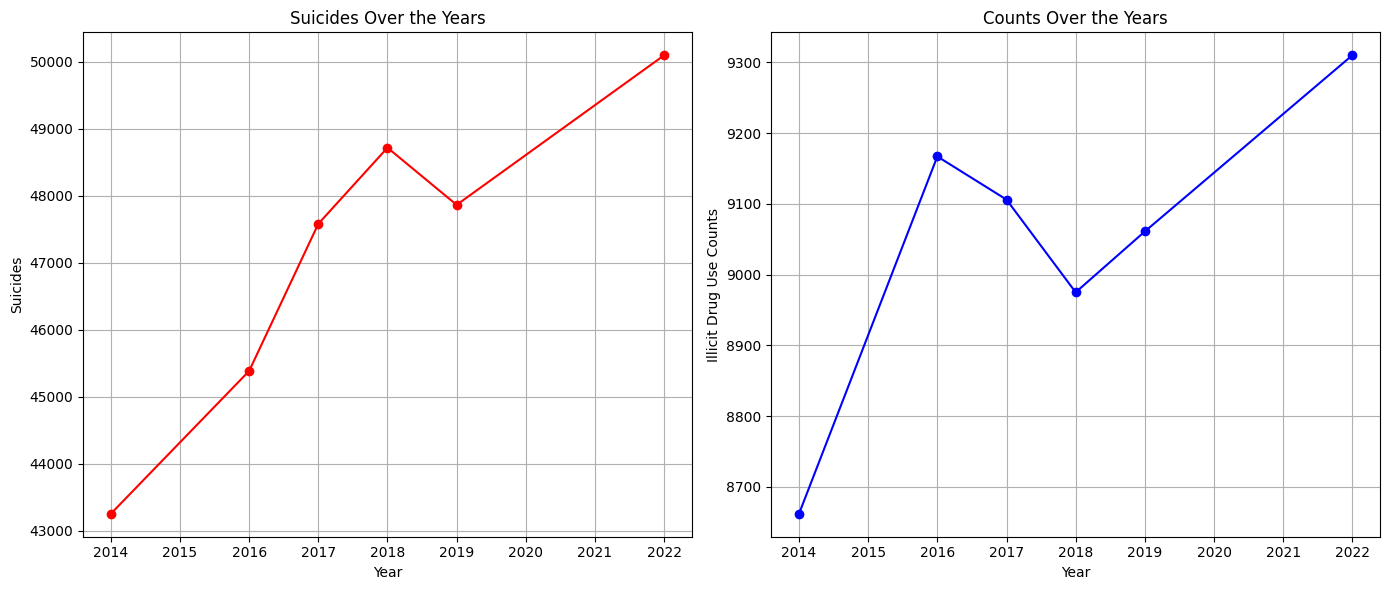

In [49]:
import matplotlib.pyplot as plt

# Create a figure and a set of subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot deaths over the years
ax[0].plot(illicit_drug_use_suicides_groupedby_year['Year'], illicit_drug_use_suicides_groupedby_year['Deaths'], marker='o', color='red')
ax[0].set_title('Suicides Over the Years')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Suicides')
ax[0].grid()

# Plot counts over the years
ax[1].plot(illicit_drug_use_suicides_groupedby_year['Year'], illicit_drug_use_suicides_groupedby_year['Count'], marker='o', color='blue')
ax[1].set_title('Counts Over the Years')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Illicit Drug Use Counts')
ax[1].grid()

# Show the plots
plt.tight_layout()
plt.show()


In [50]:
# Correlation of Illicit Drug Use and Suicide Deaths per 100,000
illicit_drug_use_suicides_groupedby_state = illicit_drug_use_suicides_df.groupby('State').agg({
    'Count': 'sum',
    'Deaths': 'sum',
    'Counts per 100k': 'mean',
    'Deaths per 100k': 'mean'
}).reset_index()
illicit_drug_use_suicides_groupedby_state
import plotly.express as px

# Create a scatter plot between Counts per 100k and Deaths per 100k using groupedby_state DataFrame
drug_corr_plot = px.scatter(illicit_drug_use_suicides_groupedby_state,
                 x='Counts per 100k',
                 y='Deaths per 100k',
                 template='presentation',
                 title='Suicide Rate vs Illicit Drug Use by State',
                 labels={'Counts per 100k': 'Illicit Drug Use Counts per 100,000', 'Deaths per 100k': 'Average Suicides per 100,000'},
                 hover_name='State'
                 )

# Show the plot
drug_corr_plot.show()
drug_corr_plot.write_image("IllicitDrugUse-Suicides-Scatterplot.png", width=9, height=6, scale=2)


**Observations**: The x-axis shows the rate of illicit drug use per 100,000 people, excluding marijuana. The plot reveals no strong trend or correlation between illicit drug use and suicide rates, indicating that drug use alone is not a major factor influencing suicide rates across states. For instance, in the three states with the lowest suicide rates, drug use rates vary considerably, yet their suicide rates remain nearly the same. This pattern underscores the limited impact of drug use levels on suicide rates.

#### Population Density Analysis




In [51]:

us_state_area_df.sample(5)


,State,Area (sq miles)
16,Kentucky,40408
48,Wisconsin,65496
0,Alabama,52420
9,Georgia,59425
8,Florida,65758


In [52]:

# Group suicide_state_year by state and calculate mean population and deaths per 100k
suicide_state_summary = suicide_state_year_df.groupby('State').agg({
    'Population': 'mean',
    'Deaths per 100k': 'mean',
    'Deaths': 'sum'
}).reset_index()

# Rename columns for clarity
suicide_state_summary = suicide_state_summary.rename(columns={
    'Population': 'Average Population',
    'Deaths per 100k': 'Average Deaths per 100k'
})
# Merge suicide_state_summary with us_state_area_df on State
suicide_population_density_df = pd.merge(suicide_state_summary, us_state_area_df, on='State', how='inner')

# Calculate population density
suicide_population_density_df['Population Density'] = suicide_population_density_df['Average Population'] / suicide_population_density_df['Area (sq miles)']

# Display the first few rows of the merged dataframe
suicide_population_density_df.head()




,State,Average Population,Average Deaths per 100k,Deaths,Area (sq miles),Population Density
0,Alabama,4.751661e+06,14.367335,15770,52420,90.645952
1,Alaska,7.018418e+05,23.556552,3825,665384,1.054792
2,Arizona,6.421353e+06,17.679041,26371,113990,56.332598
3,Arkansas,2.895717e+06,16.454833,11017,53179,54.452260
4,California,3.741191e+07,10.369229,89536,163695,228.546471


In this chart, we can use log scales for both Population Density and Average Deaths per 100,000 to better visualize the relationship between these variables. Log scales help spread out the data, making it easier to compare states with vastly different population densities and death rates, and reveal any underlying relationships more clearly.

In [53]:
# Correlation between Population Density and Suicide Deaths
# Create the scatter plot
fig = px.scatter(
    suicide_population_density_df,
    x='Population Density',
    y='Average Deaths per 100k',
    hover_data=['State'],
    labels={
        'Population Density': 'Population Density (people per sq mile)',
        'Average Deaths per 100k': 'Average Deaths per 100,000'
    },
    title='Suicide Rate vs Population Density by State'
)

# Update layout for better readability
fig.update_layout(
    xaxis_title='Population Density (people per sq mile)',
    yaxis_title='Average Suicides per 100,000',
    hovermode='closest'
)

# Show the plot
fig.show()
#fig.write_image("PopulationDensity-Suicides-Scatterplot.png", width=9, height=6, scale=2)


In [54]:
# Create the scatter plot
fig = px.scatter(
    suicide_population_density_df,
    x='Population Density',
    y='Average Deaths per 100k',
    hover_data=['State'],
    labels={
        'Population Density': 'Population Density (people per sq mile)',
        'Average Deaths per 100k': 'Average Deaths per 100,000'
    },
    title='Suicide Rate vs Population Density by State'
)

# Update layout for better readability
fig.update_layout(
    xaxis_title='Population Density (people per sq mile) (log scale)',
    yaxis_title='Average Suicides per 100,000 (log scale)',
    hovermode='closest'
)

# Apply logarithmic scale to both axes
fig.update_xaxes(type='log')
fig.update_yaxes(type='log')


# Show the plot
# Increase height margin slightly
fig.update_layout(height=550, margin=dict(t=40, b=40))

fig.show()
#fig.write_image("PopulationDensity-Suicides-Scatterplot-logscale.png", width=9, height=6, scale=2)

In [55]:
#Create the above plot and add HFR as colour
suicde_popden_gunownr_df = pd.merge(suicide_population_density_df, gun_ownership_by_state_df, on='State', how='inner')
suicde_popden_gunownr_df.head()



,State,Average Population,Average Deaths per 100k,Deaths,Area (sq miles),Population Density,Average HFR
0,Alabama,4.751661e+06,14.367335,15770,52420,90.645952,0.506647
1,Alaska,7.018418e+05,23.556552,3825,665384,1.054792,0.591000
2,Arizona,6.421353e+06,17.679041,26371,113990,56.332598,0.376235
3,Arkansas,2.895717e+06,16.454833,11017,53179,54.452260,0.513176
4,California,3.741191e+07,10.369229,89536,163695,228.546471,0.194059


In [56]:
# Relationship among Suicide Deaths, Population Density, and Average HFR

fig = px.scatter(
    suicde_popden_gunownr_df,
    x='Population Density',
    y='Average Deaths per 100k',
    color='Average HFR',
    hover_data=['State'],
    labels={
        'Population Density': 'Population Density (people per sq mile)',
        'Average Deaths per 100k': 'Average Deaths per 100,000',
        'Average HFR': 'Average Household Firearm Rate'
    },
    title='Suicide Rate vs Population Density with Average HFR'
)

fig.update_layout(
    xaxis_title='Population Density (people per sq mile)',
    yaxis_title='Average Suicides per 100,000',
    coloraxis_colorbar_title='Average HFR',
    hovermode='closest'  # Show hover data for the nearest point
)

fig.show()
#fig.write_image("PopulationDensity-Suicides-HFR-Scatterplot.png", width=9, height=6, scale=2)

In [57]:
# Relationship among Suicide Deaths, Population Density, and Average HFR (log scale)
fig = px.scatter(
    suicde_popden_gunownr_df,
    x='Population Density',
    y='Average Deaths per 100k',
    color='Average HFR',
    hover_data=['State'],
    labels={
        'Population Density': 'Population Density (people per sq mile)',
        'Average Deaths per 100k': 'Average Deaths per 100,000',
        'Average HFR': 'Average Household Firearm Rate'
    },
    title='Suicide Rate vs Population Density with Average HFR'
)

fig.update_layout(
    xaxis_title='Population Density (people per sq mile) (log scale)',
    yaxis_title='Average Suicides per 100,000 (log scale)',
    coloraxis_colorbar_title='Average HFR',
    hovermode='closest'
)

# Apply logarithmic scale to both axes
fig.update_xaxes(type='log')
fig.update_yaxes(type='log')


# Show the plot
# Increase height margin slightly
fig.update_layout(height=550, margin=dict(t=40, b=40))

fig.show()
#fig.write_image("PopulationDensity-Suicides-HFR-Scatterplot-logscale.png", width=9, height=6, scale=2)

**Observations**: An inverse relationship seems to exist between population density and suicide rates: states with lower population density often have higher suicide rates, while those with higher density typically show lower rates. This trend may be influenced by geographic factors, such as reduced access to mental health care and increased social isolation in less densely populated areas.

We added HFR to the suicide rate - population density chart. This updated chart reveals that sparsely populated regions tend to have higher HFR, suggesting that both HFR and low population density may contribute to elevated suicide rates in these states.

In [58]:
# Group by state and calculate sum of veteran deaths for each state
veteran_suicide_state_df = veteran_suicide_df.groupby('State')['Veteran Deaths'].sum().reset_index()

# Sort in descending order by number of deaths
veteran_suicide_state_df = veteran_suicide_state_df.sort_values('Veteran Deaths', ascending=False)

# Merge the two dataframes on the State column
veteran_state_suicide_df = pd.merge(veteran_suicide_state_df, suicide_state_summary,
                   on='State',
                   how='inner')
veteran_state_suicide_df
veteran_state_suicide_df['Veteran Deaths Per 100k'] = veteran_state_suicide_df['Veteran Deaths']/veteran_state_suicide_df['Average Population'] *100000
veteran_state_suicide_df.sample(5)


,State,Veteran Deaths,Average Population,Average Deaths per 100k,Deaths,Veteran Deaths Per 100k
37,Montana,1021,9.993312e+05,23.637050,5485,102.168328
21,Kentucky,2366,4.320775e+06,15.623497,15586,54.758694
8,Georgia,4044,9.697717e+06,12.452243,28035,41.700537
4,Ohio,5252,1.155694e+07,12.933243,34423,45.444550
13,Missouri,3534,5.954569e+06,15.753490,21674,59.349386


In [59]:
# Create a scatter plot using Plotly Express with a trendline
fig = px.scatter(veteran_state_suicide_df,
                 x='Average Deaths per 100k',
                 y='Veteran Deaths Per 100k',
                 hover_name='State',
                 trendline="ols",  # Add an Ordinary Least Squares regression trendline
                 title=f'Average Deaths per 100k vs Veteran Deaths Per 100k by State<br>Correlation: {correlation:.2f}',
                 labels={'Average Deaths per 100k': 'Average Suicides per 100,000',
                         'Veteran Deaths Per 100k': 'Veteran Suicides Per 100,000'},
                 trendline_color_override="red")  # Change the trendline color to red

# Customize the layout
fig.update_layout(
    xaxis_title='Average Suicides per 100k',
    yaxis_title='Veteran Suicides Per 100k',
    showlegend=False
)

# Show the plot
fig.show()

In [60]:
veteran_state_suicide_df
veteran_state_suicide_df['Veteran Suicide Share'] = veteran_state_suicide_df['Veteran Deaths Per 100k']/veteran_state_suicide_df['Average Deaths per 100k']
veteran_state_suicide_df.sample(5)

,State,Veteran Deaths,Average Population,Average Deaths per 100k,Deaths,Veteran Deaths Per 100k,Veteran Suicide Share
35,Utah,1242,2.797204e+06,17.646155,11558,44.401481,2.516213
48,Vermont,354,6.244680e+05,16.480977,2371,56.688257,3.439618
45,Hawaii,447,1.354902e+06,12.506872,3928,32.991321,2.637856
21,Kentucky,2366,4.320775e+06,15.623497,15586,54.758694,3.504894
18,Alabama,2597,4.751661e+06,14.367335,15770,54.654575,3.804086


In [61]:
# Sort the dataframe by 'Veteran Suicide Share' in descending order
top_10_states_veterans = veteran_state_suicide_df.sort_values('Veteran Suicide Share', ascending=False).head(10)

# Create a bar plot using Plotly Express
fig = px.bar(
    top_10_states_veterans,
    x='State',
    y='Veteran Suicide Share',
    title='Top 10 States with Highest Veteran Suicide Share',
    labels={'Veteran Suicide Share': 'Veteran Suicide Share'},
)

# Update layout for better readability
fig.update_layout(
    xaxis_title='State',
    yaxis_title='Veteran Suicide Share',
    xaxis={'categoryorder':'total descending'}
)

# Show the plot
fig.show()
fig.write_image("Top10-Veteran-Suicides-Barplot.png", width=9, height=6, scale=2)

**Observations**: Veteran suicides constitute a significant portion of the total suicides. Notably, two of the top three states in overall suicide rates also rank highly in veteran suicides, along with several other states in the top 10. This suggests that veteran suicides may be a considerable factor contributing to the elevated suicide rates in these states.

In [62]:
depression_df
depression_df = depression_df.drop('Suicide Total per 100 k population', axis=1)
depression_df.sample(5)

,Year,State,Race/Ethnicity,depression per 100K
2,2020,Arizona,All Races/Ethnicities,44
11,2020,Hawaii,All Races/Ethnicities,38
14,2020,Indiana,All Races/Ethnicities,47
0,2020,Alabama,All Races/Ethnicities,42
148,2022,Virginia,All Races/Ethnicities,48


In [63]:
# Group by State and calculate the average depression per 100k
depression_by_state = depression_df.groupby('State')['depression per 100K'].mean().reset_index()
suicide_state_year_2020_2022 = suicide_state_year_df[(suicide_state_year_df['Year'] >= 2020) & (suicide_state_year_df['Year'] <= 2022)]
grouped_suicide_state_year_2020_2022= suicide_state_year_2020_2022.groupby('State')['Deaths per 100k'].mean().reset_index()
merged_suicide_depression_df = pd.merge(grouped_suicide_state_year_2020_2022, depression_by_state, on='State', how='inner')
merged_suicide_depression_df.sample(5)


,State,Deaths per 100k,depression per 100K
30,New Mexico,25.064426,38.333333
25,Montana,29.827831,44.666667
31,New York,8.781617,36.666667
34,Ohio,15.008748,44.333333
28,New Hampshire,17.033896,40.666667


In [64]:
# Calculate the correlation coefficient
correlation_dep = merged_suicide_depression_df['Deaths per 100k'].corr(merged_suicide_depression_df['depression per 100K'])

# Create a scatter plot with a trendline
dep_corr_plot = px.scatter(merged_suicide_depression_df,
                 x='depression per 100K',
                 y='Deaths per 100k',
                 hover_name='State',
                 template='presentation',
                 trendline="ols",
                 title=f'Suicide Rate vs Depression Rate by State<br>Correlation: {correlation_dep:.2f}',
                 labels={'depression per 100K': 'Depression Rate per 100,000',
                         'Deaths per 100k': 'Average Suicides per 100,000'},
                 trendline_color_override="red")
dep_corr_plot.update_layout(
    xaxis_title='Depression Rate per 100,000',
    yaxis_title='Average Suicides per 100,000',
    showlegend=False
)
dep_corr_plot.show()
dep_corr_plot.write_image("Depression-Suicides-Scatterplot-trendline.png", width=9, height=6, scale=2)

**Observations**: The final part of our analysis focuses on mental health, particularly depression. Our chart shows a loose correlation between mental health indicators and suicide rates across states, with one notable exception: Alaska, which stands out significantly on the far right. This suggests that depression and mental health challenges may be key factors contributing to Alaska's high suicide rates.